In [1]:
### Using csv

### Import dependencies

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np #For scientific computing with Python
import random  #Set seed for random number generator
import struct  #For handling binary data stored in files (It is used to perform conversions between Python values and C structs represented as Python strings.)
import os
import random as rnd

### Import keras

In [3]:
import keras
from keras.models import load_model
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import TensorBoard   #Visualize the performance of tensorflow training session
from keras import backend

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
batch_size = 256  #How many images will be input at once (Better performance(not sure about accuracy) but larger memory)
num_classes = 36
epochs = 10

## File paths

In [5]:
Emnist_file_path = "C:/Users/praga/OneDrive/Documents/Rutgers/Rutgers_Misc/Additional or Extra Files/Rutgers Project 3/Source Code/emnist/"

In [6]:
digits_train = Emnist_file_path + 'emnist-digits-train.csv'
letters_train = Emnist_file_path + 'emnist-letters-train.csv'
digits_test = Emnist_file_path + 'emnist-digits-test.csv'
letters_test = Emnist_file_path + 'emnist-letters-test.csv'

## Load Data

In [7]:
digits_train_data = pd.read_csv(digits_train)
letters_train_data = pd.read_csv(letters_train)
digits_test_data = pd.read_csv(digits_test)
letters_test_data = pd.read_csv(letters_test)

In [8]:
print(digits_train_data.shape)
print(letters_train_data.shape)
print(digits_test_data.shape)
print(letters_test_data.shape)

(239999, 785)
(88799, 785)
(39999, 785)
(14799, 785)


In [9]:
print(type(digits_train_data))
print(type(digits_test_data))
# print(digits_train_data)
print(digits_train_data.shape)
# print(digits_test_data)
print(digits_test_data.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(239999, 785)
(39999, 785)


## Prepare or preprocess Data

In [10]:
digits_training_data = digits_train_data.values
letters_training_data = letters_train_data.values
digits_testing_data = digits_test_data
letters_testing_data = letters_test_data

In [11]:
print(digits_training_data.shape)
print(letters_training_data.shape)
print(digits_testing_data.shape)
print(letters_testing_data.shape)

(239999, 785)
(88799, 785)
(39999, 785)
(14799, 785)


In [12]:
print('Preparing letters labels for concatenation')
letters_training_data[:, 0:1] =  letters_training_data[:, 0:1] + 9
letters_testing_data.iloc[:, 0:1] =  letters_testing_data.iloc[:, 0:1] + 9

Preparing letters labels for concatenation


In [13]:
print('Conconcatening datas')
Complete_training_data = np.concatenate((digits_training_data, letters_training_data), axis=0)
rnd.shuffle(Complete_training_data)

x_train = Complete_training_data[:, 1:].astype('float32')
y_train = Complete_training_data[:, 0:1]
print('x_train shape : ', x_train.shape)

Complete_testing_data = np.concatenate((digits_testing_data, letters_testing_data), axis=0)

x_test = Complete_testing_data[:, 1:].astype('float32')
y_test = Complete_testing_data[:, 0:1]
print('x_test shape : ', x_test.shape)

print('transposing data')

# for dense
x_train = np.array(list(map(lambda x : x.reshape(28, 28).transpose().flatten(), x_train)))
x_test = np.array(list(map(lambda x : x.reshape(28, 28).transpose().flatten(), x_test)))

Conconcatening datas
x_train shape :  (328798, 784)
x_test shape :  (54798, 784)
transposing data


In [14]:
len(y_train)

328798

data  3444  :  [3]


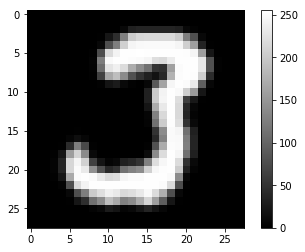

In [15]:
# Print the i data 
i = 3444
plt.imshow(x_test[i].reshape(28, 28),cmap='gray')
plt.colorbar()
print('data ', i, ' : ', y_test[i])

In [16]:
# Scale from 0 to 255
x_train /= 255
x_test /= 255

In [17]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (328798, 784)
x_test shape: (54798, 784)
328798 train samples
54798 test samples


In [18]:
# We need to convert our target labels (expected values) to categorical data
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Define Model

In [19]:
# for dense
model = Sequential()
# Add the first layer where the input dimensions are the 784 pixel values
# We can also choose our activation function. `relu` is a common
model.add(Dense(512, activation='relu', input_shape=(784,))) 
model.add(Dropout(0.5))  # Dropout is a regularization technique for reducing overfitting in neural networks by preventing complex co-adaptations on training data. It is a very efficient way of performing model averaging with neural networks. The term "dropout" refers to dropping out units in a neural network.
# Add a second hidden layer
model.add(Dense(128, activation='relu'),)
model.add(Dropout(0.5))
# Add a third hidden layer
model.add(Dense(64, activation='relu'),)
# Add our final output layer where the number of nodes 
# corresponds to the number of y labels
model.add(Dense(num_classes, activation='softmax')) 

## Compile Model

In [20]:
# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=['accuracy'])

## Summarize model

In [21]:
# We can summarize our model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 36)                2340      
Total params: 478,180
Trainable params: 478,180
Non-trainable params: 0
_________________________________________________________________


## Train Model

* Training consists of updating our weights using our optimizer and loss function. In this example, we choose 10 iterations (loops) of training that are called epochs.
* We also choose to shuffle our training data and increase the detail printed out during each training cycle.



In [22]:
# Fit (train) the model
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    shuffle=True,
    verbose=5,
    validation_split=0.1
)

Train on 295918 samples, validate on 32880 samples
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


## Evaluating the Model

We use our testing data to validate our model. This is how we determine the validity of our model (i.e. the ability to predict new and previously unseen data points)

In [23]:
score = model.evaluate(x_test, y_test, verbose=1)

54798/54798 [==============================] - 3s 46us/step


In [24]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9076095065062212
Test accuracy: 0.8050841271579254


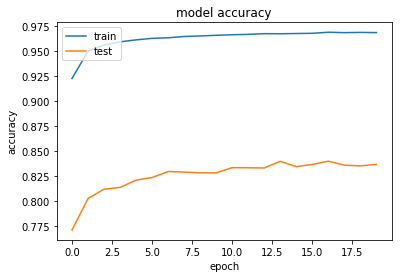

In [25]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



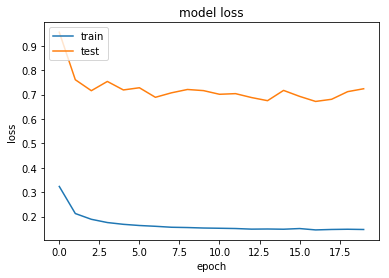

In [26]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
model.save('Emnist02.h5')

## Making Predictions
We can use our trained model to make predictions using model.predict